## 1. Importing Packages


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as po
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel

## 2.Data Loading

In [20]:
df = pd.read_csv('netflix_customer_churn.csv', sep=',')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


## 3. Data Cleaning

In [21]:
# ----------------------
# Data overview
# ----------------------
print(df.shape)        
print(df.info())       
print(df.isnull().sum())  
print(df.duplicated().sum())  
df.describe(include='all')  

(5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), obje

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
count,5000,5000.000000,5000,5000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000
unique,5000,NaN,3,3,NaN,NaN,6,5,NaN,NaN,5,NaN,NaN,7
top,a9b75100-82a8-427a-a208-72f24052884a,NaN,Female,Premium,NaN,NaN,South America,Tablet,NaN,NaN,Debit Card,NaN,NaN,Drama
freq,1,NaN,1711,1693,NaN,NaN,873,1048,NaN,NaN,1030,NaN,NaN,731
mean,NaN,43.847400,NaN,NaN,11.649450,30.089800,NaN,NaN,13.683400,0.503000,NaN,3.024400,0.874800,NaN
std,NaN,15.501128,NaN,NaN,12.014654,17.536078,NaN,NaN,3.692062,0.500041,NaN,1.415841,2.619824,NaN
min,NaN,18.000000,NaN,NaN,0.010000,0.000000,NaN,NaN,8.990000,0.000000,NaN,1.000000,0.000000,NaN
25%,NaN,30.000000,NaN,NaN,3.337500,15.000000,NaN,NaN,8.990000,0.000000,NaN,2.000000,0.110000,NaN
50%,NaN,44.000000,NaN,NaN,8.000000,30.000000,NaN,NaN,13.990000,1.000000,NaN,3.000000,0.290000,NaN
75%,NaN,58.000000,NaN,NaN,16.030000,45.000000,NaN,NaN,17.990000,1.000000,NaN,4.000000,0.720000,NaN


## 3.EDA

## Numerical Data Exploration

In [22]:
numeric_columns_data = df.select_dtypes(include=['number'])
numeric_columns_data

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
0,51,14.73,29,8.99,1,1,0.49
1,47,0.70,19,13.99,1,5,0.03
2,27,16.32,10,13.99,0,2,1.48
3,53,4.51,12,17.99,1,2,0.35
4,56,1.89,13,13.99,1,2,0.13
...,...,...,...,...,...,...,...
4995,19,49.17,11,8.99,0,4,4.10
4996,67,9.24,2,8.99,0,3,3.08
4997,66,16.55,49,13.99,1,2,0.33
4998,59,9.12,3,8.99,0,4,2.28


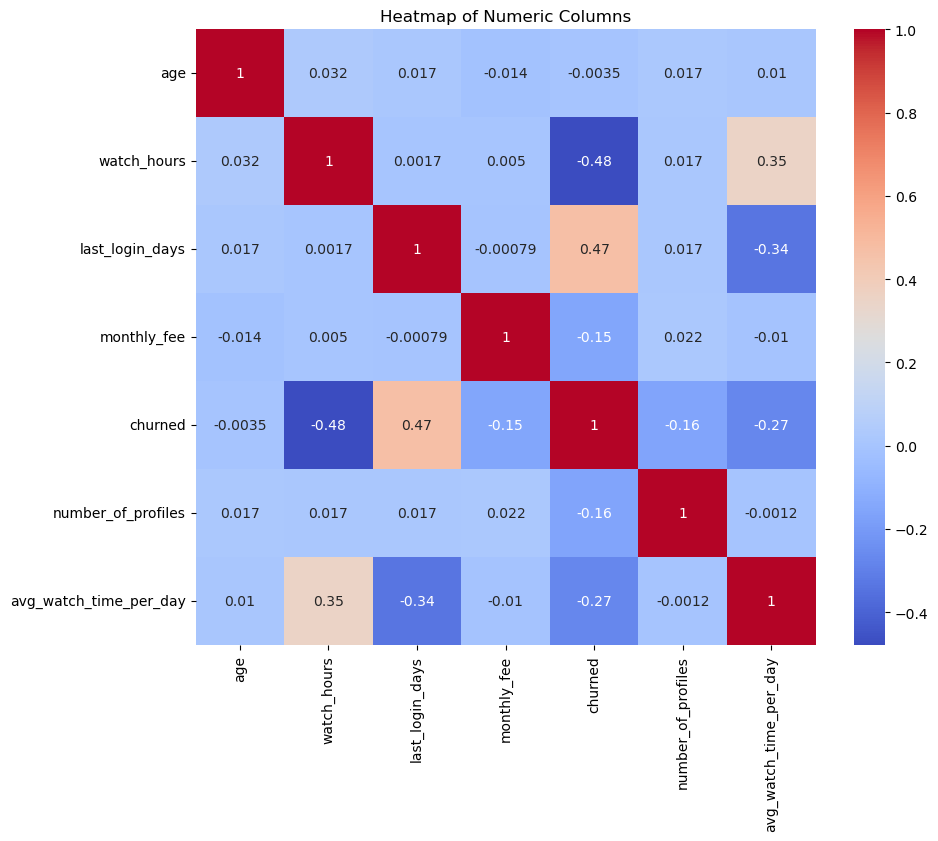

In [23]:
numeric_columns_data.corr()
plt.figure(figsize=(10, 8))  # optional: set size
sns.heatmap(numeric_columns_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Numeric Columns')
plt.show()

## Categorical Data Exploration

'gender', 'subscription_type', 'region', 
                             'device', 'payment_method', 'favorite_genre'

In [24]:
plot_by_payment_hist = df.groupby('gender').churned.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_payment_hist['gender'],
        y=plot_by_payment_hist['churned'],
        width=[0.3, 0.3, 0.3],
        marker=dict(
            color=['tomato', 'skyblue', 'limegreen']
        )
    )
]
plot_layout=go.Layout(
    xaxis={"type": "category"},
    yaxis={"title": "Churn Rate"},
    title='Churn Rate by Gender',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [25]:
plot_by_payment_hist = df.groupby('subscription_type').churned.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_payment_hist['subscription_type'],
        y=plot_by_payment_hist['churned'],
        width=[0.3, 0.3, 0.3],
        marker=dict(
            color=['tomato', 'skyblue', 'limegreen']
        )
    )
]
plot_layout=go.Layout(
    xaxis={"type": "category"},
    yaxis={"title": "Churn Rate"},
    title='Churn Rate by Subscription type',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [26]:
plot_by_payment_hist = df.groupby('region').churned.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_payment_hist['region'],
        y=plot_by_payment_hist['churned'],
        width=[0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
        marker=dict(
            color=['tomato', 'skyblue', 'limegreen',  'magenta',
    'yellow', 'black']
        )
    )
]
plot_layout=go.Layout(
    xaxis={"type": "category"},
    yaxis={"title": "Churn Rate"},
    title='Churn Rate by Region',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [27]:
plot_by_payment_hist = df.groupby('device').churned.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_payment_hist['device'],
        y=plot_by_payment_hist['churned'],
        width=[0.3, 0.3, 0.3, 0.3, 0.3],
        marker=dict(
            color=['tomato', 'skyblue', 'limegreen',  'magenta',
    'yellow']
        )
    )
]
plot_layout=go.Layout(
    xaxis={"type": "category"},
    yaxis={"title": "Churn Rate"},
    title='Churn Rate by Device',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [28]:
plot_by_payment_hist = df.groupby('payment_method').churned.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_payment_hist['payment_method'],
        y=plot_by_payment_hist['churned'],
        width=[0.3, 0.3, 0.3, 0.3, 0.3],
        marker=dict(
            color=['tomato', 'skyblue', 'limegreen',  'magenta',
    'yellow']
        )
    )
]
plot_layout=go.Layout(
    xaxis={"type": "category"},
    yaxis={"title": "Churn Rate"},
    title='Churn Rate by Payment Method',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [29]:
plot_by_payment_hist = df.groupby('favorite_genre').churned.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_payment_hist['favorite_genre'],
        y=plot_by_payment_hist['churned'],
        width=[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
        marker=dict(
            color=['tomato', 'skyblue', 'limegreen',  'magenta',
    'yellow', 'orange',
    'purple']
        )
    )
]
plot_layout=go.Layout(
    xaxis={"type": "category"},
    yaxis={"title": "Churn Rate"},
    title='Churn Rate by Genre',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

## 4. Data Preprocessing

In [30]:
df = df.drop(columns=['customer_id'])

In [31]:
df['churned'].value_counts(normalize=True)

churned
1    0.503
0    0.497
Name: proportion, dtype: float64

In [32]:
df = pd.get_dummies(df, 
                    columns=['gender', 'subscription_type', 'region', 
                             'device', 'payment_method', 'favorite_genre'], 
                    drop_first=True)

In [33]:
num_cols = ['age', 'watch_hours', 'last_login_days', 
            'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [34]:
df.head()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,0.461471,0.256425,-0.062152,-1.271341,1,-1.429965,-0.146895,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,0.203399,-0.911432,-0.632462,0.083051,1,1.395494,-0.322497,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,-1.086959,0.388777,-1.145741,0.083051,0,-0.723600,0.231031,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,0.590506,-0.594288,-1.031679,1.166565,1,-0.723600,-0.200339,False,True,True,...,True,False,False,False,False,False,False,True,False,False
4,0.784060,-0.812377,-0.974648,0.083051,1,-0.723600,-0.284322,False,True,False,...,True,False,False,False,False,False,False,False,False,False


## 5. Feature Selection

## 5.Data Modeling

In [35]:
X = df.drop('churned', axis=1)
y = df['churned']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.888

Confusion Matrix:
 [[431  66]
 [ 46 457]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       497
           1       0.87      0.91      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000


ROC-AUC Score: 0.9659347736518515
